In [55]:
import numpy as np
import datetime
import scipy as sp
import scipy.fftpack
import pandas as pd
import seaborn as sns
from numpy.fft import *
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import os

In [56]:
def filter_signal(signal, threshold=1e3):
    fourier = rfft(signal)
    frequencies = rfftfreq(signal.size, d=20e-3/signal.size)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)


In [57]:
# see total data
print(os.listdir('../data'))


# hyperparameter
period = 20

['DJI_fe.csv', 'DJI_STO_20period_sma10.csv', 'N225.csv', 'DJI_modified_features - DJI.csv', 'N225fillVOL.csv', 'DJI_modified_sma.csv', 'downjone5y.csv', 'N225withoutNULL.csv', 'dowjone1985_2019.csv', '.ipynb_checkpoints', 'DJI_ema.csv', 'DJI_denoise.csv']


In [58]:
df = pd.read_csv('../data/DJI_fe.csv')

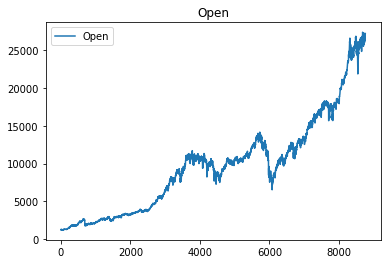

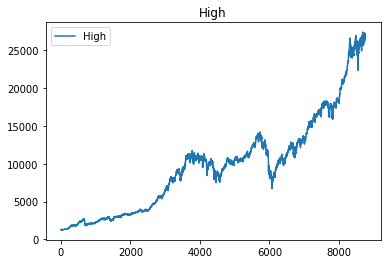

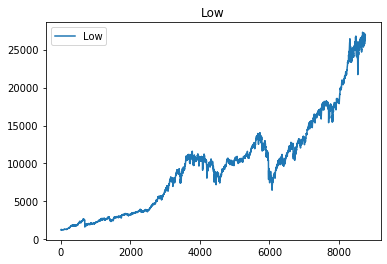

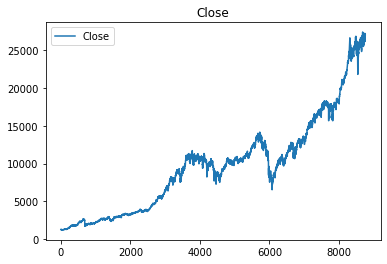

In [59]:
cols = ['Open', 'High', 'Low', 'Close']
for col in cols:
    df.plot(y=[col], title=col)

In [60]:
df_avg = df.dropna().groupby('Date').mean()
df_avg.head()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,sma_5,sma_10,sma_25,sma_75,sma_125,sma_200
Date,,,,,,,,,,,,,
1985-11-12,199,1431.079956,1446.099976,1421.099976,1433.599976,1433.599976,19860000,1414.563989,1399.930005,1373.977598,1341.201732,1333.50832,1310.084103
1985-11-13,200,1432.680054,1439.790039,1419.380005,1427.750000,1427.750000,10740000,1419.426001,1405.148010,1378.018799,1342.320265,1334.70592,1310.759753
1985-11-14,201,1425.689941,1443.810059,1420.640015,1439.219971,1439.219971,12710000,1427.361987,1411.639001,1382.464800,1343.561865,1335.93696,1311.516453
1985-11-15,202,1435.780029,1450.569946,1425.689941,1435.089966,1435.089966,16310000,1433.507984,1416.122998,1386.270801,1344.730399,1336.97864,1312.258052
1985-11-18,203,1433.260010,1447.250000,1422.250000,1440.020020,1440.020020,12790000,1435.135987,1421.156995,1389.682402,1345.855732,1338.02120,1313.069553


In [61]:
date = df_avg.index.to_datetime()
temp = (df_avg['High'] + df_avg['Low']) / period
N = len(temp)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  """Entry point for launching an IPython kernel.


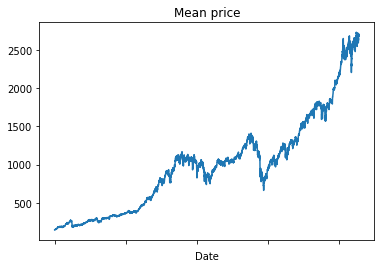

In [62]:
temp.plot(title='Mean price')

In [63]:
temp_fft = sp.fftpack.fft(temp)
temp_psd = np.abs(temp_fft) ** 2
fftfreq = sp.fftpack.fftfreq(len(temp_psd), 1./365)
i = fftfreq > 0

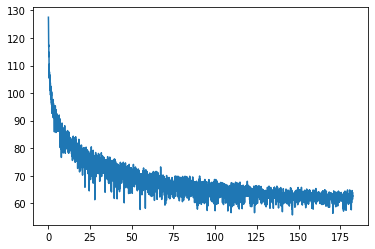

In [64]:
plt.plot(fftfreq[i], 10*np.log10(temp_psd[i]))

In [65]:
temp_fft_bis = temp_fft.copy()
temp_fft_bis[np.abs(fftfreq)> 1.1] = 0

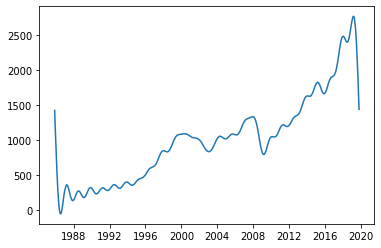

In [66]:
temp_slow = np.real(sp.fftpack.ifft(temp_fft_bis))
# temp.plot()
plt.plot_date(date, temp_slow, '-')

In [69]:
# df['denoised'] = temp_slow
# temp_slow
temp_slow

array([1422.59055237, 1407.90491249, 1393.21208259, ..., 1466.58638619,
       1451.93308142, 1437.26720652])

In [52]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,denoised
8757,2019-10-25,26789.609375,27015.369141,26765.679688,26958.060547,26958.060547,274610000,1472.696085
8758,2019-10-28,27040.330078,27167.880859,27028.710938,27090.720703,27090.720703,290770000,1457.470362
8759,2019-10-29,27061.070313,27165.939453,27039.759766,27071.460938,27071.460938,269610000,1442.230551
8760,2019-10-30,27110.710938,27204.359375,26999.640625,27186.689453,27186.689453,231750000,1426.978599
8761,2019-10-31,27188.369141,27188.369141,26918.289063,27046.230469,27046.230469,270910000,1411.716455


In [54]:
df.to_csv('../data/DJI_denoise.csv')